# Analyzing data

Class `CycleAnalyzer` is used for calculating and plotting circadian cycles data.

Here's an example of analyzing randomly generated activity data.

In [1]:
import numpy as np
from chronobiology.chronobiology import DBQuery, CycleAnalyzer, generate_data

In [2]:
# Generate random data to use as input for demonstration.
data = generate_data()

# Prepare input arrays for CycleAnalyzer
# (when working with InfluxDB, same arrays must be selected using a DBQuery instance).
timestamps = data['time'] # timestamps of measurements
values = data['value']    # activity values
nights = data['is_night'] # night activity markers

print(f'{len(timestamps)} measurements generated.')
np.set_printoptions(threshold=10)
data

852 measurements generated.


{'time': array(['2020-01-01T00:54:00.000000000', '2020-01-01T07:11:00.000000000',
        '2020-01-01T09:12:00.000000000', ...,
        '2020-01-10T19:31:00.000000000', '2020-01-10T20:49:00.000000000',
        '2020-01-10T23:25:00.000000000'], dtype='datetime64[ns]'),
 'value': array([1, 1, 1, ..., 1, 1, 1]),
 'is_night': array([False,  True, False, ..., False,  True, False])}

In [3]:
# Create cycle analyzer.
ca = CycleAnalyzer(timestamps, values, nights)

## Actogram

The most obvious way of assessing circadian disruption is to simply look at experimental
actograms. This visual inspection should always take the form of circadian disruption into account,
and whether this is environmental or genetic in origin. This will also determine the appropriate
controls, be they baseline conditions or wildtype littermates, respectively. Furthermore, when studying
circadian disruption under different lighting paradigms, comparing activity relative to the external LD
cycle is critical. This initial visual inspection of actogram data will guide the choice of which additional
measurements are likely to be most informative.

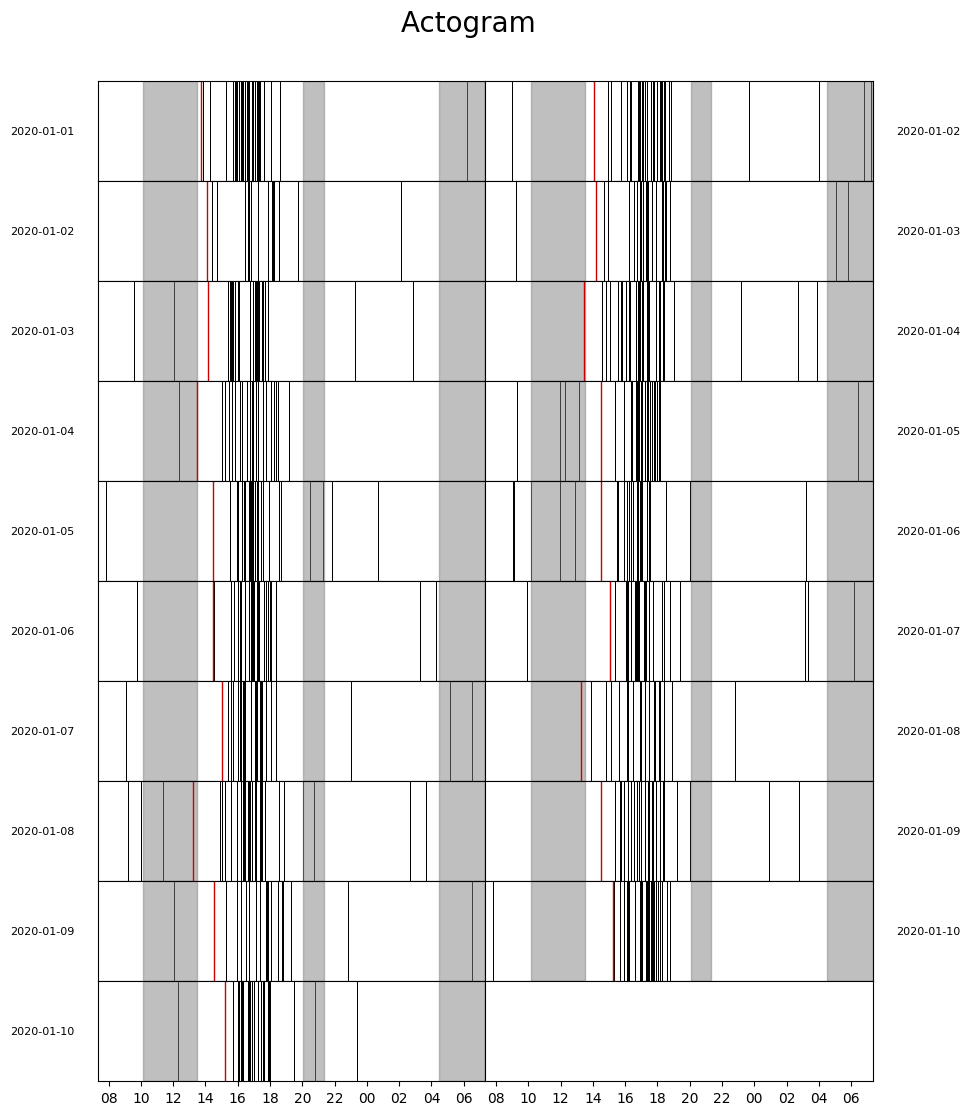

In [4]:
ca.plot_actogram()

## Periodogram

The power of a periodogram provides a measure of the strength and regularity of the underlying
rhythm, with higher values indicating robust rhythms. In circadian disruption — where rhythms are
typically less robust — periodogram power is expected to be reduced and low values may indicate the
absence of a significant circadian rhythm. The power of the chi-square periodogram ($Q_p$) has been
widely used as a measure of the robustness of circadian rhythms, and can be traced back to studies
on the effects of constant light on the strength of activity and sleep rhythms in rats. Analysis of
$Q_p$ based upon simulated and empirical data sets has shown that this provides a valuable measure of
the robustness of circadian rhythms. Periodogram analysis is particularly informative in internal
desynchrony, where the power of multiple periodicities within a dataset will be evident.

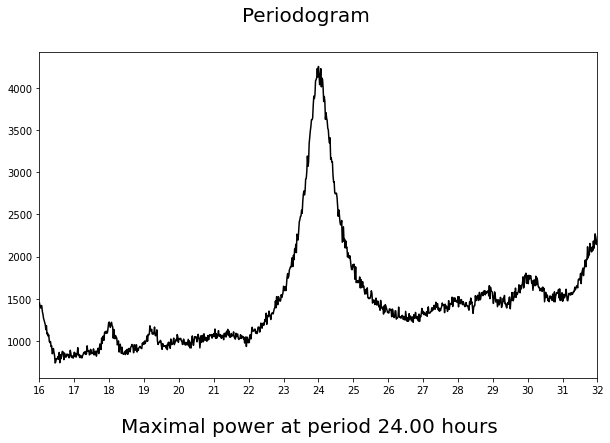

In [5]:
ca.plot_periodogram()

## Activity oneset

A hallmark of normal circadian function is that activity onset is consistent from day to day.
In most records, the onset of activity is typically a more precise phase marker than the
offset of activity. As such, the variability in activity onset across multiple days -- either relative to
the light/dark cycle (phase angle of entrainment) or under constant conditions -- provides a useful
metric to describe the precision of circadian rhythms. Phase angle of entrainment and the variability
in activity onset have been widely used in the study of circadian entrainment. Activity onset
is particularly informative when studying circadian misalignment and chronodisruption, where the
phasing of activity with regard to environmental zeitgebers is expected to differ.

In [6]:
ca.activity_onset()

array(['2020-01-01T13:44', '2020-01-02T14:06', '2020-01-03T14:11',
       '2020-01-04T13:28', '2020-01-05T14:29', '2020-01-06T14:30',
       '2020-01-07T15:02', '2020-01-08T13:15', '2020-01-09T14:32',
       '2020-01-10T15:13'], dtype='datetime64[m]')

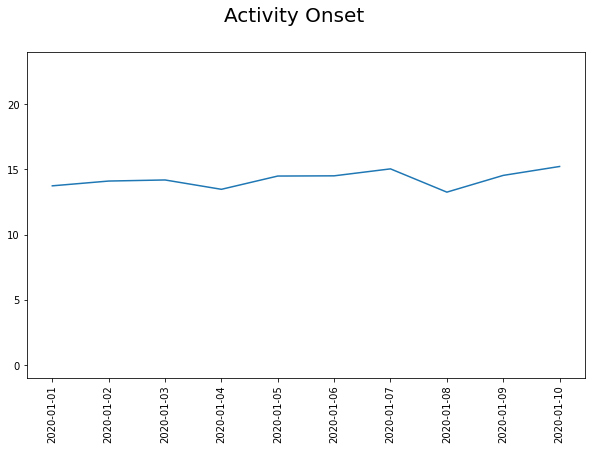

In [7]:
ca.plot_activity_onset()

## Light phase activity

In nocturnal species, such as laboratory mice, activity is normally confined to the dark phase of
the light/dark cycle. A hallmark of disrupted rhythms is therefore an increased activity in the
normally inactive light phase, and such changes are expected to occur in both circadian misalignment
and chronodisruption. In diurnal species, dark phase activity can similarly be used to quantify the
amount of activity occurring in the normal inactive phase. Light phase activity has been widely used
to study defects in circadian entrainment to light as well as in disease-relevant models.
Light phase activity also provides an ideal measure to assess the
impact of misaligned feeding, a specific example of circadian misalignment.

In [8]:
ca.light_activity(auc=True)

(array([0.96470588, 0.94186047, 0.92405063, 0.91764706, 0.89655172,
        0.94444444, 0.93975904, 0.94186047, 0.93333333, 0.96202532]),
 0.9364705882352942,
 9.368385750518032)

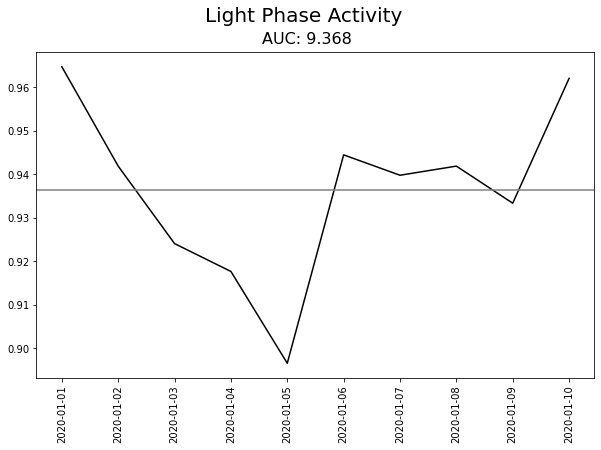

In [9]:
ca.plot_light_activity()

## Activity bouts

As a result of less consolidated activity and rest phases, circadian disruption is associated with an
increased number and reduced duration of activity bouts. The number and duration of activity bouts
are frequently used as a measure of fragmentation in circadian disruption. Due to the inappropriate
phasing of activity/rest cycles with regard to the external environmental, circadian misalignment,
internal desynchrony and chronodisruption are all expected to affect activity bouts.

In [10]:
ca.daily_bouts()

(array([58, 74, 56, 66, 72, 68, 68, 60, 63, 49]),
 array([1.46551724, 1.16216216, 1.41071429, 1.28787879, 1.20833333,
        1.32352941, 1.22058824, 1.43333333, 1.42857143, 1.59183673]))

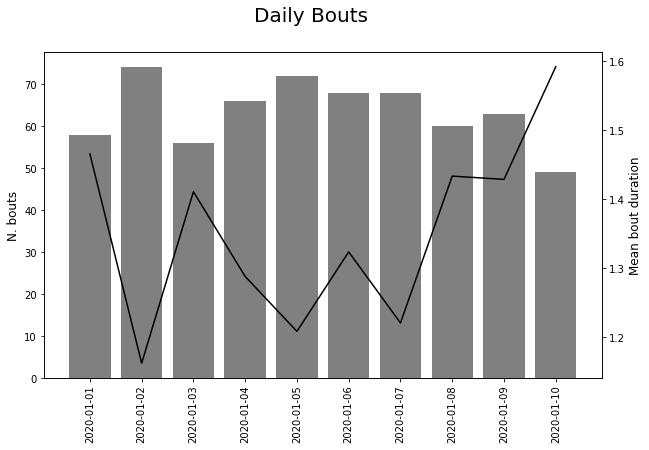

In [11]:
ca.plot_daily_bouts()

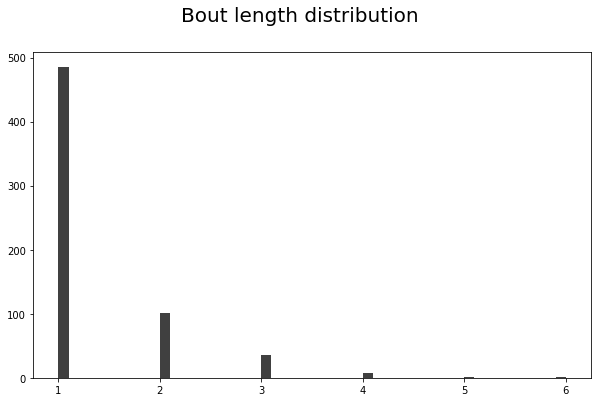

In [12]:
ca.plot_bout_histogram()

## Inter-daily stability

Inter-daily stability (IS) measures the day-to-day reproducibility of rest/activity cycles. Patterns
of activity are typically reproducible in healthy individuals, whereas circadian disruption results in
more variable rhythms. IS was first described in the study of elderly human patients with Alzheimer’s
disease. It has subsequently been widely used in a number of human studies, and has
also been adopted for studying circadian disruption in animal models. Due to the day-to-day changes
in the relationship between circadian and environmental time, decreased IS may be expected in internal
desynchrony. However, circadian misalignment and chronodisruption may not influence IS if a stable
new phase-relationship is established.

In [13]:
ca.interdaily_stability()

0.9513386952342614

## Intra-daily variability

Intra-daily variability (IV) is a measure of the fragmentation of activity rhythms. First introduced
for the study of patients with Alzheimer’s disease, like IS it has been readily adopted for the
study of animal models of circadian disruption. IV measures the frequency of transitions between
activity and rest across the day. More transitions between activity and rest result in higher IV scores.
As with activity bouts, circadian misalignment, internal desynchrony and chronodisruption may
all increase IV due to the inappropriate phasing of activity/rest cycles with regard to the external
environment. A good example of this occurs in aging, where IV increases steadily with age in mice.

In [14]:
ca.intradaily_variability()

(array([0.6297713 , 0.51153513, 0.55392898, 0.35781526, 0.67840058,
        0.61347609, 0.56154865, 0.45233752, 0.46433507, 0.62096071]),
 0.5522103107233137)

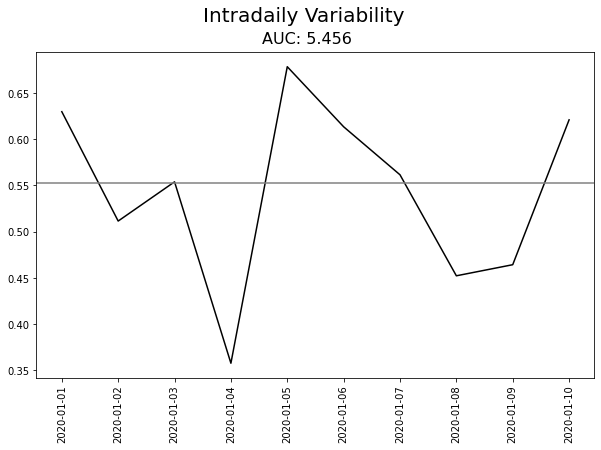

In [15]:
ca.plot_intradaily_variability()

## Relative amplitude

Perhaps the most obvious measure of the strength of any biological rhythm is its amplitude.
A simple metric that has been widely used in human studies is relative amplitude (RA), again
originating from studies in patients with Alzheimer’s disease. RA is a simple measure of
the difference between periods of peak activity and rest. As healthy rhythms are assumed to display
consolidated activity and rest periods, RA is expected to be reduced when normal circadian rhythms
are disrupted. Both circadian misalignment and chronodisruption will reduce RA, with internal
desynchrony potentially resulting in RA values that fluctuate as periods move in and out of phase.

In [16]:
ca.relative_amplitude(auc=True)

(array([0.95121951, 0.94871795, 0.94520548, 0.90243902, 0.85542169,
        0.89873418, 0.84415584, 0.94936709, 0.86046512, 1.        ]),
 0.9144654088050315,
 9.161644063059976)

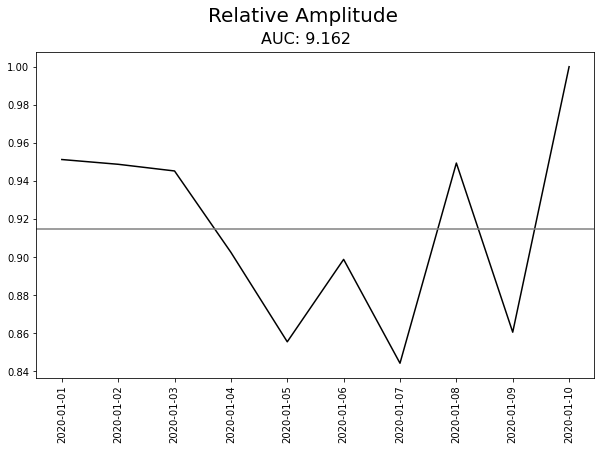

In [17]:
ca.plot_relative_amplitude()